In [168]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os  

In [169]:
print(os.listdir('assets'))

['.DS_Store', '00000.jpg']


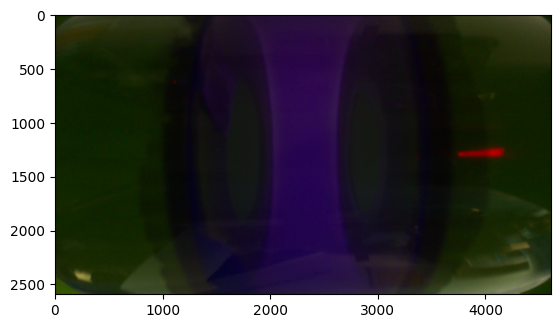

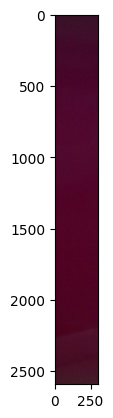

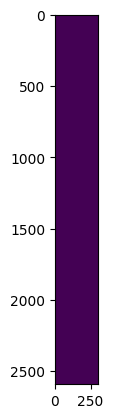

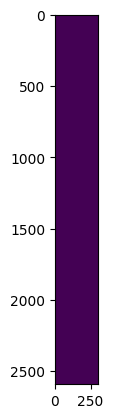

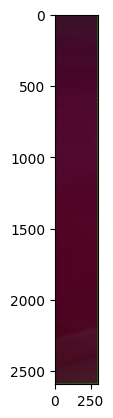

In [170]:
for filename in os.listdir('assets'): 
    try:
        # print(filename)
        x = 2200
        w = 300 ## for cropping the images
        img = cv2.imread('assets/'+filename)
        imgplot = plt.imshow(img)
        plt.show()
        img = img[:, x:x+w]
        img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # print(img.shape)

        imgplot = plt.imshow(img1)
        plt.show()
        # print('canny')
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # plt.imshow(canny)
        # plt.show()
        canny = cv2.Canny(img1, 100, 200)
        # plt.imshow(canny)
        # plt.show()

        # access the pixel located at x=50, y=20
        (r, g, b) = img1[2200, 150]
        # print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

        lower = np.array([40, 0, 0])
        upper = np.array([255, 50, 50])
        shapeMask = cv2.inRange(img1, lower, upper)
        # plt.imshow(shapeMask)
        cont,_ = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cont_img = cv2.drawContours(img1, cont, -1, (0, 255, 0), 2)
        # plt.imshow(cont_img)   

        c = max(cont, key=cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        # print(y)
        cv2.rectangle(img1,(x,y),(x+w,y+h),(0,255,0),2)
        # plt.imshow(img1)
        
        filename = f'{y}size'+filename
        filepath = os.path.join('processedimages', filename)

        cv2.imwrite(filepath, cv2.cvtColor(img1, cv2.COLOR_RGB2BGR))
    except:
        ValueError